In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

<AxesSubplot:>

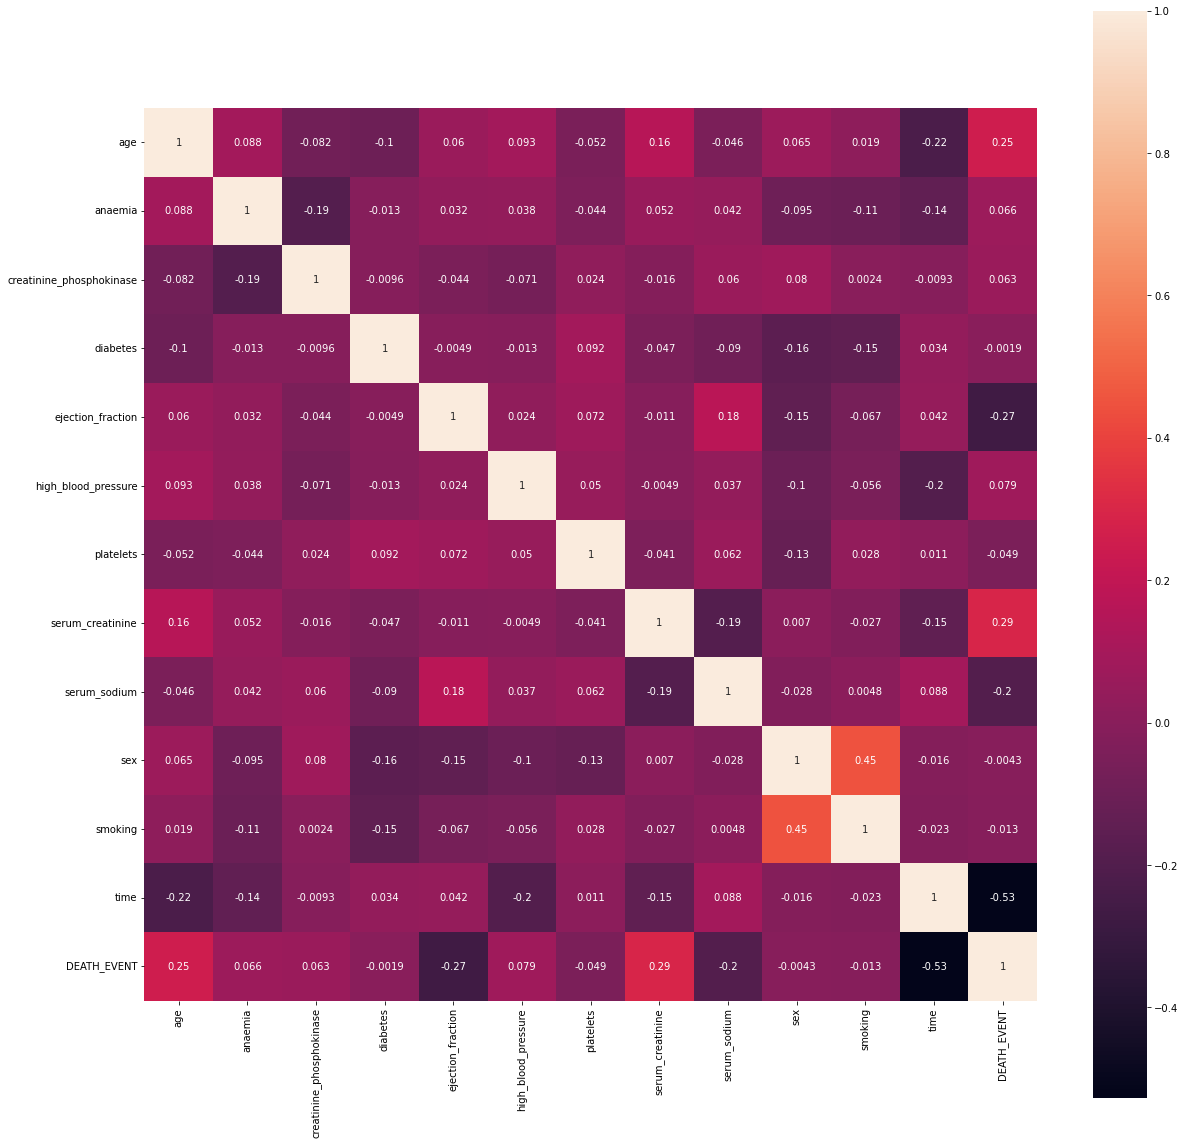

In [6]:
# Correlation heatmap
correlation_mat = df.corr()
plt.subplots(figsize = (20, 20))
sns.heatmap(correlation_mat, annot = True, square = True)

In [7]:
# Time, Serum_creatine, Ejection_fraction, Age

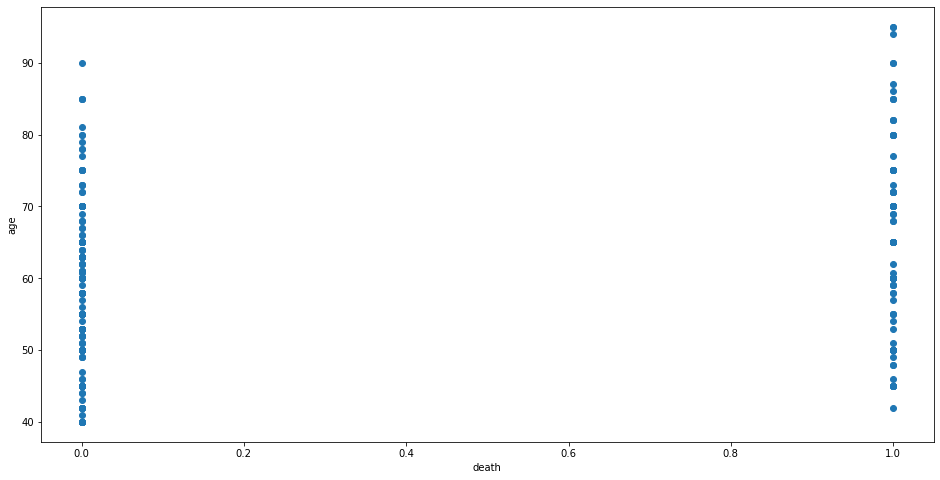

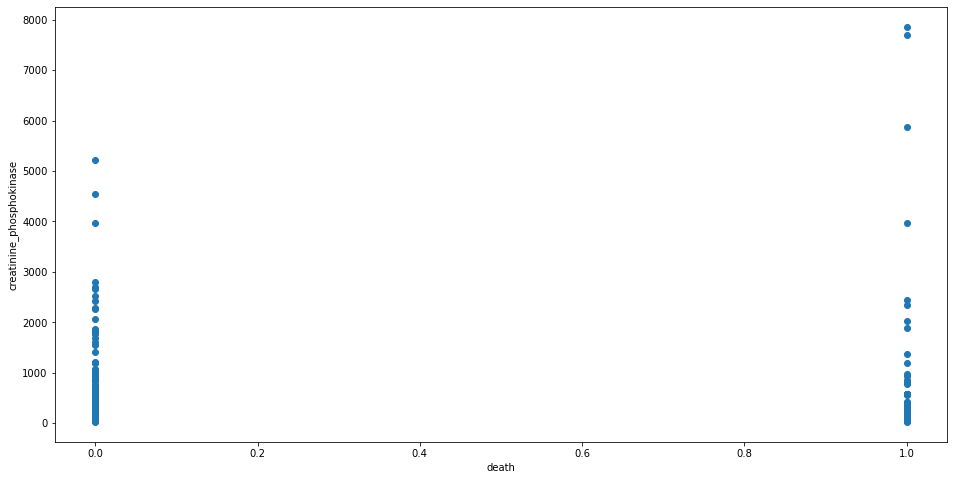

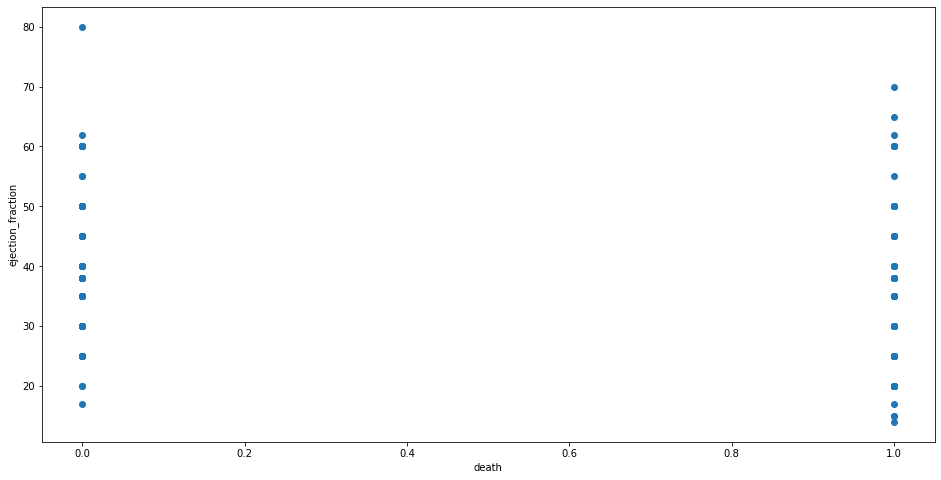

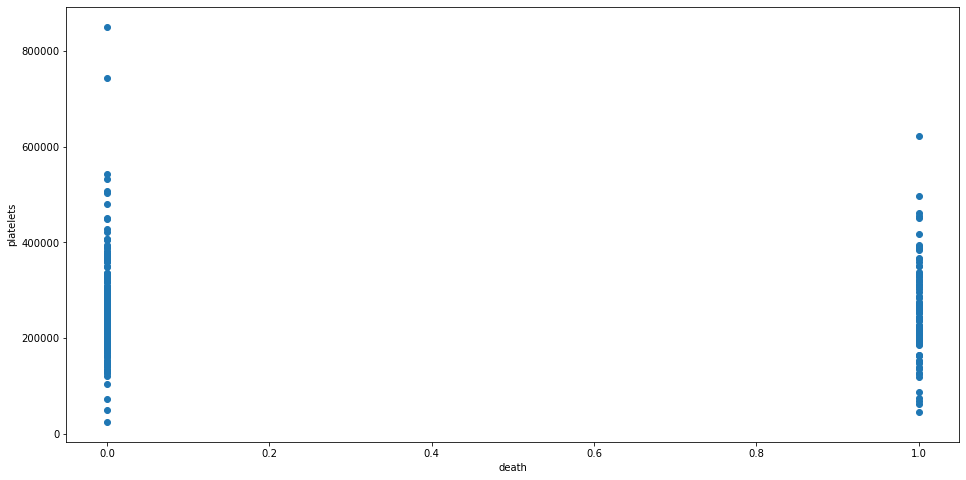

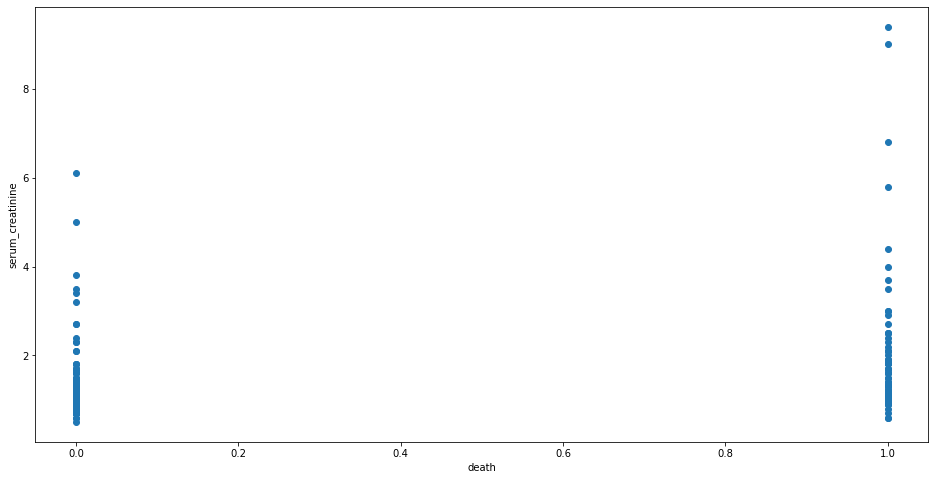

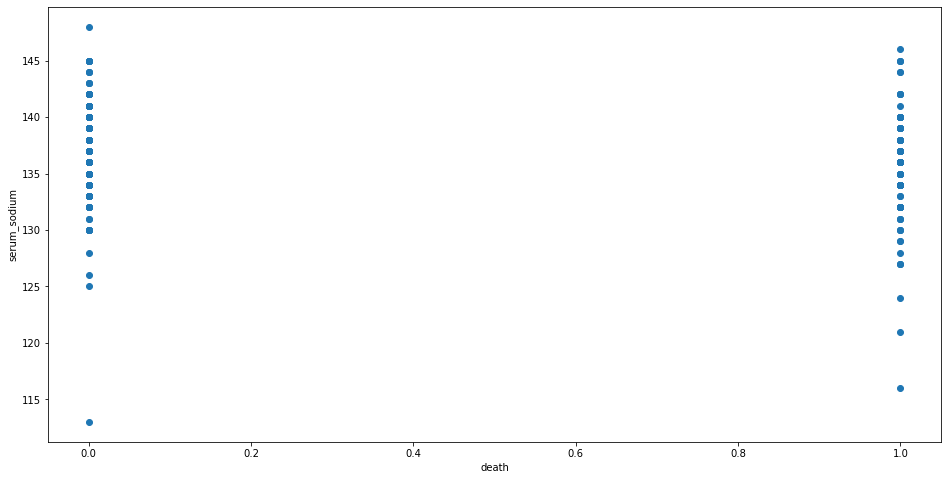

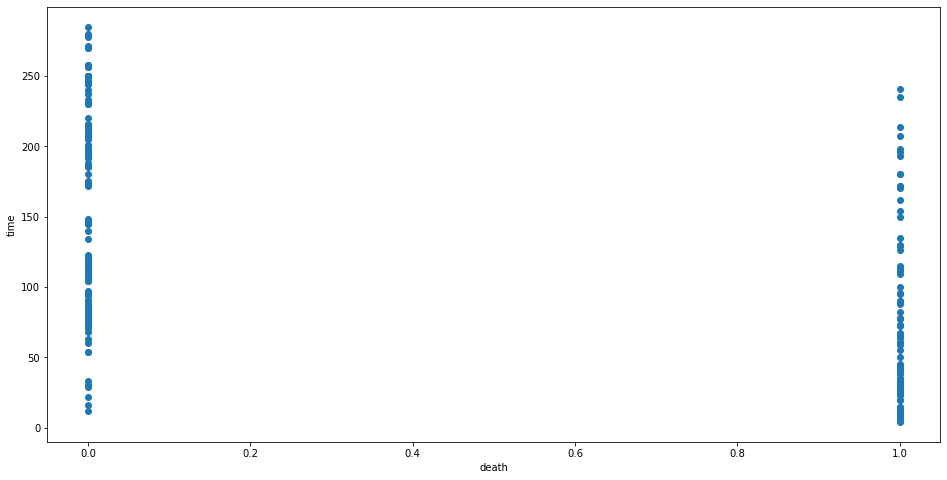

In [14]:
# Outliers with scatterplots
features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium",
            "time"]
for i in features: 
    fig, ax = plt.subplots(figsize = (16, 8))
    ax.scatter(df["DEATH_EVENT"], df[i])
    ax.set_xlabel('death')
    ax.set_ylabel(i)
    plt.show()

In [15]:
# There are outliers
# Won't be removing them due to small dataset


In [16]:
# Data Preprocessing

X = df.drop(["DEATH_EVENT"], axis = 1)
y = df["DEATH_EVENT"]

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

In [19]:
# Scale
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = col_names)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [20]:
# Train Test Split
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

In [21]:
model = svm.SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7888888888888889

In [ ]:
#78.9% Acc